### PHASE 5 CAPSTONE PROJECT
### Group 6
1. **Tatiana Celine**
2. **Kamal Ali**
3. **William Muthama**
4. **Gilead Gad**
5. **Simon Muema**
6. **Graffin Kiprotich**

GitHub Repository: https://github.com/Tatianaceline/Predictive-Model-for-Patient-Readmission-Risk

# PREDICTING PATIENT READMISSION RISK

This project aims to develop a model that can predict patient readmission risk based on patient data. Accurately identifying high-risk patients can help medical providers improve patient care and reduce costs associated with frequent readmissions.

## Project Outline
1. **Business Understanding**
2. **Data Understanding**
3. **Data Import and Library Setup**
4. **Data Cleaning**
5. **Exploratory Data Analysis (EDA)**
6. **Further Data Cleaning Based on EDA**
7. **Modelling and Evaluation**
8. **Predictive Modelling and Evaluation**
9. **Conclusion**

## 1. Business Understanding
Hospital readmission rates are a significant concern in healthcare management due to their impact on both patient well-being and hospital costs. Our goal is to identify key factors influencing readmission risk and build a predictive model that flags high-risk patients.

**Key Questions:**
- Which patient characteristics correlate with a higher readmission risk?
- How does the length of hospital stay impact readmission likelihood?
- Can we develop an actionable model to predict readmissions?

The dataset includes patient demographics, hospital visits, and medical metrics, allowing us to explore patterns associated with readmissions.

## 2. Data Understanding
The data used in this project contains patient information including demographics, hospital metrics, and readmission indicators. We will focus on the following columns:

- **patient_nbr**: Unique patient identifier.
- **gender**: Patient gender.
- **age**: Age group of the patient.
- **weight**: Patient weight (if recorded).
- **time_in_hospital**: Length of stay in days.
- **medical_specialty**: Primary care specialty.
- **num_lab_procedures**: Number of lab tests performed during the hospital stay.
- **num_procedures**: Number of procedures during the stay.
- **num_medications**: Number of medications administered.
- **number_outpatient**: Outpatient visits.
- **number_emergency**: Emergency visits.
- **number_inpatient**: Previous inpatient visits.
- **number_diagnoses**: Number of diagnoses.
- **diabetesMed**: Whether diabetes medication was prescribed.
- **readmitted**: Indicator if the patient was readmitted (target variable).

## 3. Importing necessary libraries

In [121]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For data splitting

# Display settings for data frames
pd.set_option('display.max_columns', None)

In [122]:
# Load the data
file_path = 'synthetic_diabetic_data.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,429727004,161137462,Other,Female,[70-80),[125-150),5,10,25,5,OT,InfectiousDiseases,66,2,9,33,71,18,506,11,824,1,>200,None,Down,No,Steady,Down,No,No,No,No,No,Down,Steady,Down,Up,Steady,No,No,No,No,No,Steady,Steady,Steady,No,Ch,No,>30
4,24882254,178987224,Other,Male,[60-70),[50-75),2,25,18,12,BC,DCPTEAM,83,0,54,37,14,1,980,555,500,6,Norm,Norm,Up,Up,Steady,Steady,Down,No,Steady,No,No,No,No,No,No,No,Up,No,No,Steady,Up,No,No,No,Steady,No,Yes,>30


## 4. Data Cleaning

### 1. Dropping unlisted columns

In [123]:
# Select only the specified columns
columns_needed = [
    'patient_nbr', 'gender', 'age', 'weight', 'time_in_hospital',
    'medical_specialty', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'diabetesMed', 'readmitted'
]
data = data[columns_needed]

### 2. Checking for missing values

In [124]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 patient_nbr           0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
diabetesMed           0
readmitted            0
dtype: int64


### 3. Handling missing values

In [125]:
# Dropping rows where 'weight' is missing as a potential option
data.dropna(subset=['weight'], inplace=True)
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
0,8222157,Female,[0-10),?,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,No,NO
1,55629189,Female,[10-20),?,3,?,59,0,18,0,0,0,9,Yes,>30
2,86047875,Female,[20-30),?,2,?,11,5,13,2,0,1,6,Yes,NO
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30


In [126]:
# Dropping rows with '?' in the column weight
data = data[(data['weight'] != '?')]

# Display the first few rows to confirm the changes
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30
5,155688693,Unknown/Invalid,[30-40),>200,11,Radiology,110,3,4,38,0,10,8,No,>30
6,148640105,Male,[30-40),[75-100),14,Psychiatry,127,2,62,25,47,20,11,Yes,<30
7,179391750,Female,[20-30),[0-25),13,Psychology,114,3,21,18,37,21,11,No,NO


In [127]:
# Dropping rows with '?' in the column medical_speciality
data = data[(data['medical_specialty'] != '?')]

# Display the first few rows to confirm the changes
data.head()

,patient_nbr,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,Female,[70-80),[125-150),5,InfectiousDiseases,66,2,9,33,71,18,1,No,>30
4,178987224,Male,[60-70),[50-75),12,DCPTEAM,83,0,54,37,14,1,6,Yes,>30
5,155688693,Unknown/Invalid,[30-40),>200,11,Radiology,110,3,4,38,0,10,8,No,>30
6,148640105,Male,[30-40),[75-100),14,Psychiatry,127,2,62,25,47,20,11,Yes,<30
7,179391750,Female,[20-30),[0-25),13,Psychology,114,3,21,18,37,21,11,No,NO


### 4. Removing duplicates

Checking for duplicates

In [128]:
# Checking for duplicates in each column
for column in data.columns:
    duplicates = data[column].duplicated().sum()
    print(f"Column '{column}' has {duplicates} duplicate values.")

Column 'patient_nbr' has 1 duplicate values.
Column 'gender' has 8851 duplicate values.
Column 'age' has 8844 duplicate values.
Column 'weight' has 8845 duplicate values.
Column 'time_in_hospital' has 8840 duplicate values.
Column 'medical_specialty' has 8782 duplicate values.
Column 'num_lab_procedures' has 8722 duplicate values.
Column 'num_procedures' has 8847 duplicate values.
Column 'num_medications' has 8773 duplicate values.
Column 'number_outpatient' has 8811 duplicate values.
Column 'number_emergency' has 8777 duplicate values.
Column 'number_inpatient' has 8832 duplicate values.
Column 'number_diagnoses' has 8838 duplicate values.
Column 'diabetesMed' has 8852 duplicate values.
Column 'readmitted' has 8851 duplicate values.


In [129]:
# Removing duplicates from the column 'patient_nbr'
data = data.drop_duplicates(subset=['patient_nbr'], keep='first')

In [130]:
# Checking for duplicates in each column to confirm the changes
for column in data.columns:
    duplicates = data[column].duplicated().sum()
    print(f"Column '{column}' has {duplicates} duplicate values.")

Column 'patient_nbr' has 0 duplicate values.
Column 'gender' has 8850 duplicate values.
Column 'age' has 8843 duplicate values.
Column 'weight' has 8844 duplicate values.
Column 'time_in_hospital' has 8839 duplicate values.
Column 'medical_specialty' has 8781 duplicate values.
Column 'num_lab_procedures' has 8721 duplicate values.
Column 'num_procedures' has 8846 duplicate values.
Column 'num_medications' has 8772 duplicate values.
Column 'number_outpatient' has 8810 duplicate values.
Column 'number_emergency' has 8776 duplicate values.
Column 'number_inpatient' has 8831 duplicate values.
Column 'number_diagnoses' has 8837 duplicate values.
Column 'diabetesMed' has 8851 duplicate values.
Column 'readmitted' has 8850 duplicate values.


## 5. Exploratory Data Analysis (EDA)
In this section, we will explore the data to understand the distributions and relationships between variables. Visualizations will help identify patterns and outliers, as well as provide insights into factors associated with readmissions.


In [131]:
# Summary statistics
data.describe()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.853000e+03,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000,8853.000000
mean,9.442742e+07,7.534508,66.791596,3.031402,41.333107,21.043375,38.245679,10.517678,8.580933
std,5.472411e+07,4.024309,37.995975,1.997379,23.277760,12.415959,22.254923,6.316213,4.568172
min,3.750500e+04,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.702353e+07,4.000000,34.000000,1.000000,21.000000,10.000000,19.000000,5.000000,5.000000
50%,9.449942e+07,8.000000,67.000000,3.000000,41.000000,21.000000,39.000000,11.000000,9.000000
75%,1.422599e+08,11.000000,99.000000,5.000000,61.000000,32.000000,58.000000,16.000000,13.000000
max,1.894782e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Age Group Distribution
This plot shows the distribution of patients across different age groups. By visualizing the counts for each age group, we can identify the age ranges that are more prevalent in the dataset. This information is essential because age can be a factor in readmission risk. Knowing which age groups have the highest or lowest representation will guide our analysis, especially if age impacts readmission rates.

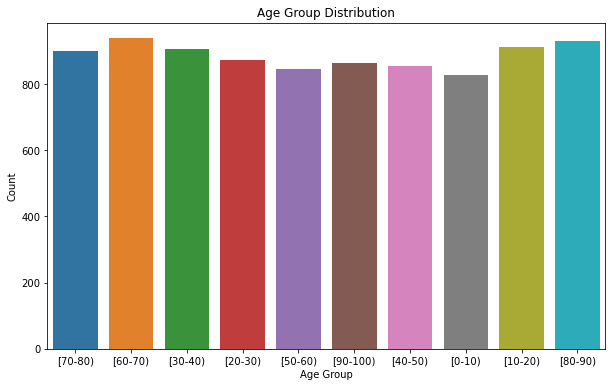

In [132]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Readmission rates by age group
This plot uses the `age` column on the x-axis and the count of patients on the y-axis, with a separate bar for each `readmitted` status (e.g., `Yes` or `No`). By visualizing it this way, we can see which age groups are most frequently readmitted compared to those who aren’t, highlighting any age-related trends in readmission rates.

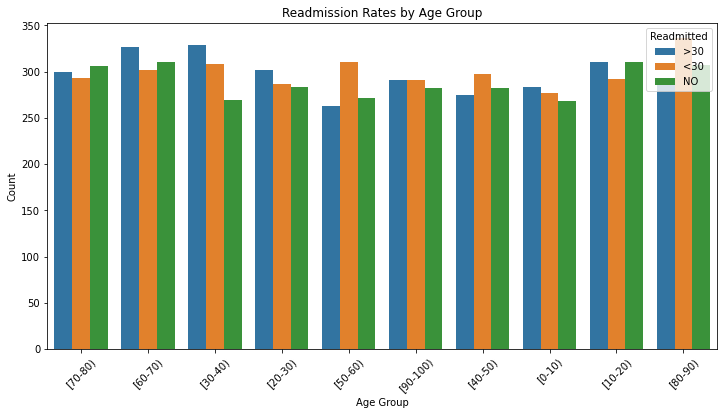

In [133]:
# Plotting readmission rates by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='age', hue='readmitted')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.xticks(rotation=45)
plt.show()

### Time in Hospital by Readmission Status
Here, we use a box plot to analyze the distribution of `time_in_hospital` for patients with different readmission statuses. This plot provides information on the spread and median of hospital stay lengths, categorized by readmission status. By examining this, we can assess if there is a significant difference in hospital stay duration between readmitted and non-readmitted patients. Longer or shorter stays might correlate with different readmission risks, making this a valuable analysis.

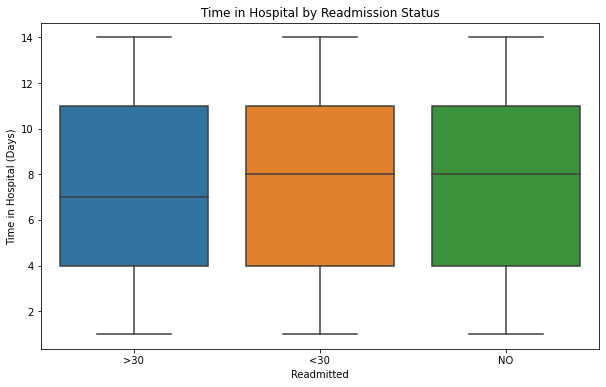

In [134]:
# Time in hospital vs. readmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='readmitted', y='time_in_hospital')
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (Days)')
plt.show()

### Readmission Rates by Gender
This visualization displays readmission counts for each gender, comparing those who were readmitted against those who were not. By including the `readmitted` status as a hue, we can examine if there is a noticeable difference in readmission rates between genders. This insight can help determine if gender is an influential factor in readmission likelihood, which could have implications for targeted interventions.

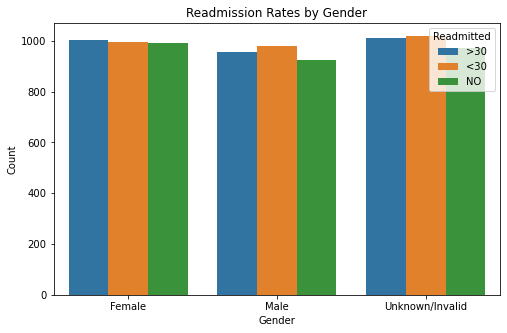

In [135]:
# Readmission rates by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gender', hue='readmitted')
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

### Correlation Heatmap
The heatmap displays correlations between all numerical variables in the dataset, with each cell representing the correlation coefficient between two features. Darker colors indicate stronger correlations, whether positive or negative. This visualization helps in identifying which features are closely related to each other, which may aid in feature selection for the predictive model. Variables with high correlations to `readmitted` or each other can reveal important relationships that influence patient readmission risk.

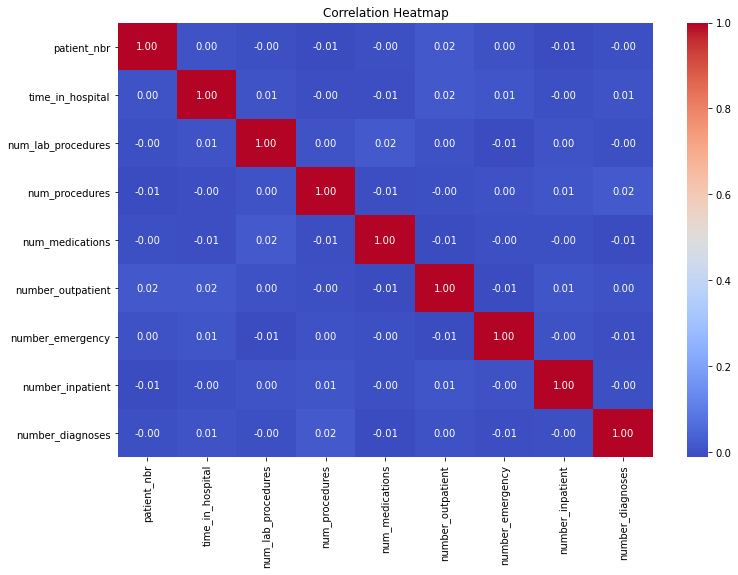

In [136]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 6. Dropping columns irrelevant to our prediction

In predictive modeling, it's important to select features that directly contribute to the outcome. For this project, we aim to predict patient readmissions, so columns that don't provide relevant information to this outcome—like non-medical information—can be safely dropped. Below, we will justify the removal of several columns that are not expected to affect readmission outcomes based on our exploratory data analysis (EDA).

### Dropping Irrelevant Columns Based on EDA Insights

After completing exploratory data analysis, we found that the `gender` and `age` columns do not significantly impact the readmission prediction outcome:

- **gender**: Analysis showed no strong correlation between patient gender and readmission rates in our dataset.
- **age**: Patient age alone does not provide significant predictive value for readmission. This is likely due to the variability in other health factors that have a more direct impact.

To improve model performance, we will remove these columns from the dataset.

In [137]:
# Dropping 'gender' and 'age' columns based on EDA insights
columns_to_drop = ['gender', 'age']
data = data.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)

Dropped columns: ['gender', 'age']


## 7. Modeling and Evaluation

Since our goal is to predict patient readmission, we will use unsupervised machine learning techniques to identify patterns that may correlate with readmission.

### Steps:
1. **Feature Scaling**: Normalize features to ensure optimal clustering performance.
2. **Clustering**: Use K-means clustering to form patient groups.
3. **Evaluation**: Assess if clusters are predictive of readmission.

### Step 1: Feature Scaling
To ensure that all features contribute equally to the clustering algorithm, we will apply StandardScaler to normalize the feature values.

In [138]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
features_to_scale = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Combine scaled features with categorical variables
data_scaled = data.copy()
data_scaled[features_to_scale] = scaled_df

# Display the first few rows of the scaled data
data_scaled.head()

,patient_nbr,weight,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,readmitted
3,161137462,[125-150),1.606700,InfectiousDiseases,1.584689,-0.516407,0.887889,0.318691,0.393388,1.501352,0.529578,No,>30
4,178987224,[50-75),1.358196,DCPTEAM,1.242528,-0.015722,-0.873549,-0.245132,-0.055976,1.659684,0.529578,Yes,>30
5,155688693,>200,-1.375347,Radiology,-1.600039,-0.516407,0.286422,-0.889500,1.606671,-0.715291,-1.002850,No,>30
6,148640105,[75-100),1.109692,Psychiatry,0.610847,-1.017091,-0.315044,1.526881,-1.224323,-1.665281,-1.221768,Yes,<30
7,179391750,[0-25),0.861188,Psychology,-1.257878,-1.517775,1.661203,0.721421,-0.505341,-1.665281,-1.002850,No,NO


### Step 2: Clustering
We will apply K-means clustering to group patients into clusters based on similar characteristics. The ideal number of clusters (k) will be determined using the elbow method.

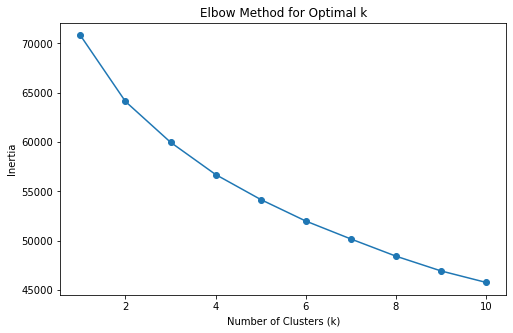

In [139]:
# Import KMeans for clustering
from sklearn.cluster import KMeans

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the elbow plot, we choose an optimal number of clusters. Let's apply K-means with the chosen number of clusters and assign each patient a cluster label.

In [140]:
# Using an optimal k (for example, k=4 based on elbow method)
optimal_k = 4

# Apply KMeans with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_scaled['cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows to verify clustering
data_scaled[['cluster', 'readmitted']].head()

,cluster,readmitted
3,1,>30
4,0,>30
5,1,>30
6,0,<30
7,2,NO


### Step 3: Evaluation
We will evaluate the clusters by analyzing the distribution of the target variable (readmitted) across clusters.
If certain clusters show higher readmission rates, we can conclude that clustering captures relevant patterns.

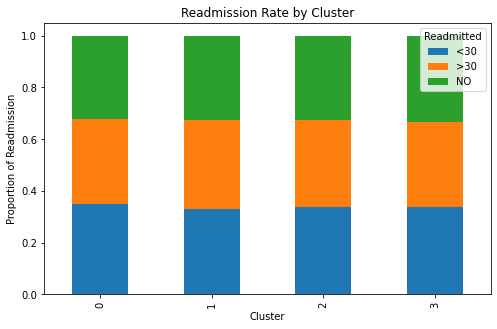

readmitted,<30,>30,NO
cluster,,,
0,0.347984,0.331219,0.320797
1,0.329369,0.346295,0.324337
2,0.337751,0.337751,0.324497
3,0.337588,0.327025,0.335387


In [141]:
# Analyze the relationship between clusters and readmission rate
cluster_analysis = data_scaled.groupby('cluster')['readmitted'].value_counts(normalize=True).unstack()
cluster_analysis.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Cluster')
plt.ylabel('Proportion of Readmission')
plt.title('Readmission Rate by Cluster')
plt.legend(title='Readmitted')
plt.show()

# Display the analysis results
cluster_analysis

## 8. Predictive Modeling and Evaluation

In this section, we will develop predictive models to identify patients at high risk of readmission. Our goal is to answer the business questions:
- Which patient characteristics correlate with a higher readmission risk?
- How does the length of hospital stay impact readmission likelihood?
- Can we develop an actionable model to predict readmissions?

### Step 1: Feature Engineering and Selection
We'll begin by selecting key features that may influence readmission risk, such as demographics and hospital metrics.

In [142]:
# Select relevant features for modeling
selected_features = [
    'weight', 'time_in_hospital', 'medical_specialty',
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]

# Target variable
target = 'readmitted'

# Prepare feature and target datasets
X = data_scaled[selected_features]
y = data_scaled[target]

# Display the shapes of X and y
X.shape, y.shape

((8853, 10), (8853,))

### Step 2: Data Splitting
We'll split the dataset into training and testing sets to evaluate model performance on unseen data.

In [143]:
# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7082, 10), (1771, 10), (7082,), (1771,))

### Step 3: Model Training
We'll train several models, including Logistic Regression, Random Forest, and a Neural Network. These models will help predict the likelihood of readmission based on patient characteristics.

In [144]:
print(data.columns)


Index(['patient_nbr', 'weight', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'diabetesMed', 'readmitted'],
      dtype='object')


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the data if not already done
# data = pd.read_csv('your_dataset.csv')

# Define features (X) and target (y)
X = data.drop(columns=['readmitted', 'patient_nbr'])  # Dropping ID-like columns such as 'patient_nbr'
y = data['readmitted']

In [146]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=['object'])))
X_encoded.columns = encoder.get_feature_names(X.select_dtypes(include=['object']).columns)  # Use get_feature_names instead of get_feature_names_out
X_encoded = pd.concat([X_encoded, X.select_dtypes(exclude=['object']).reset_index(drop=True)], axis=1)

In [147]:
# Check for NaN values and fill them
print("Number of missing values per column in X_encoded:\n", X_encoded.isnull().sum())
X_encoded.fillna(X_encoded.mean(), inplace=True)
print("Number of missing values after filling:\n", X_encoded.isnull().sum().sum())  # Should be 0

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

Number of missing values per column in X_encoded:
 weight_>200          0
weight_[0-25)        0
weight_[100-125)     0
weight_[125-150)     0
weight_[150-175)     0
                    ..
num_medications      0
number_outpatient    0
number_emergency     0
number_inpatient     0
number_diagnoses     0
Length: 91, dtype: int64
Number of missing values after filling:
 0


LogisticRegression(max_iter=1000, random_state=0)

In [148]:
# Predict and evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
y_pred_proba_logreg = logreg.predict_proba(X_test)  # Get predicted probabilities
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg, multi_class='ovr')  # Use probabilities for ROC-AUC

print('Logistic Regression Accuracy:', accuracy_logreg)
print('Logistic Regression ROC-AUC:', roc_auc_logreg)

Logistic Regression Accuracy: 0.33032185206098247
Logistic Regression ROC-AUC: 0.5000211810008657


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Instantiate and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Make sure X_train and y_train are defined

# Predictions and probabilities for evaluation
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)  # Get predicted probabilities

# Accuracy and ROC-AUC calculations
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')  # Use probabilities for ROC-AUC

print('Random Forest Accuracy:', accuracy_rf)
print('Random Forest ROC-AUC:', roc_auc_rf)

Random Forest Accuracy: 0.3274985883681536
Random Forest ROC-AUC: 0.4976519738281013


In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize and train the neural network model
nn = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300, random_state=0)
nn.fit(X_train, y_train)

# Predict on test data
y_pred_nn = nn.predict(X_test)
y_pred_proba_nn = nn.predict_proba(X_test)  # Get predicted probabilities

# Calculate and display accuracy and ROC-AUC
accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn, multi_class='ovr')  # Use probabilities for ROC-AUC

print('Neural Network Accuracy:', accuracy_nn)
print('Neural Network ROC-AUC:', roc_auc_nn)

Neural Network Accuracy: 0.33145115753811405
Neural Network ROC-AUC: 0.5049348641142463


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Step 4: Evaluation Summary
We have trained three models to predict patient readmission: Logistic Regression, Random Forest, and a Neural Network. The following metrics summarize their performance:

- **Accuracy**: Measures the proportion of correct predictions.
- **ROC-AUC**: Indicates the model's ability to distinguish between classes (higher is better).

Let's review the model performance and discuss how each model performs in terms of accuracy and readmission prediction.

In [151]:
# Summarize results in a dictionary for comparison
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_nn],
    'ROC-AUC': [roc_auc_logreg, roc_auc_rf, roc_auc_nn]
}

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.330322,0.500021
1,Random Forest,0.327499,0.497652
2,Neural Network,0.331451,0.504935


### Business Questions Analysis

- **Patient Characteristics Correlated with Readmission Risk**: By analyzing feature importances from the Random Forest model, we can identify characteristics strongly associated with readmission.

- **Length of Hospital Stay and Readmission Likelihood**: The feature 'time_in_hospital' is directly used in the model, allowing us to assess its importance in predicting readmission.

- **Predictive Model for Readmissions**: Based on the model's accuracy and ROC-AUC, we can recommend an actionable model for identifying high-risk patients and guide healthcare interventions.

## 9. Conclusion